# Flight Prices Prediction

Flight prices change all the time and everyone likes a good bargain! 

### Datasets

This project consists of 2 datasets - the train and test. 

Both Dataset have the following information:

1. Airline - name of airline

2. Date of Journey -date in dd/mm/yyyy

3. Source - Departure City

4. Destination - End City

5. Route - all the cities the flight goes through

6. Dep_time - Departure time

7. Arrival_time - Arrival Time

8. Duration - How long the flight is 

9. Total_stops - Is the flight non-stop or does it have any stops

10. Additional_info - Information like in-flight meal, layovers, baggage, etc is included in this column.

<i>Price</i> is the predictor (y) variable, it is included in the train dataset and must be predicted for test 


### Objectives 

The objective of this project is to predict the price of a flight when a set of relevant flight details are provided. This kind of model can be used to predict the fair price of a flight. The flight details has information related to flight timings, source and destination details, route details, stops in between etc.

The dataset consists of about four months of information about various flights and their respective prices. You are to analyze the data and provide the below:
1. Identify the Independent variables which are significant

2. Build predictive models to predict flight prices. Split the data into training and test sets. Build supervised models on training data and test it on the test. Use RMSE as the metric for model evaluation.

3. Use the best model to predict flight prices for which we do not have the flight prices. This is the second dataset attached. (It has 2500 observations for which flight prices have to be predicted)

## Data Import & Clean Up 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os

In [2]:
os.chdir("C:/Users/apook/Desktop/HPE/Misc/Data Analytics/Projects/Project10-CAPSTONE/8. Flight Price Prediction")

In [3]:
train = pd.read_excel("FlightPrice_train.xlsx")

In [4]:
test = pd.read_excel("FlightPrice_test.xlsx")

### Train Data Clean Up

In [5]:
train.shape

(10683, 11)

In [6]:
# delete rows with #N/A values

train.dropna(inplace= True)
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [7]:
# Delete Duplicates

train[train.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [8]:
train.drop_duplicates(keep="first", inplace=True)
train.shape

(10462, 11)

Since the system can't read strings like date of journey column, create 3 new columns for day, month and year of journey

In [9]:
train["Date_of_Journey"] = pd.to_datetime(train["Date_of_Journey"], format = "%d/%m/%Y")

train["journey_day"] = train["Date_of_Journey"].dt.day_name()

train["journey_date"] = pd.to_datetime(train["Date_of_Journey"], format = "%d/%m/%y").dt.day
train["journey_month"] = pd.to_datetime(train["Date_of_Journey"], format = "%d/%m/%y").dt.month
train["journey_year"] = pd.to_datetime(train["Date_of_Journey"], format = "%d/%m/%y").dt.year

Prepping the Departure time, Arrival time and Duration as Hour and Minute. It is easier for the system to work with

In [10]:
# Departure Time
train["dep_hour"] = pd.to_datetime(train["Dep_Time"]).dt.hour
train["dep_min"] = pd.to_datetime(train["Dep_Time"]).dt.minute

# Arrival Time
train["arr_hour"] = pd.to_datetime(train["Arrival_Time"]).dt.hour
train["arr_min"] = pd.to_datetime(train["Arrival_Time"]).dt.minute

train.drop(["Date_of_Journey", "Dep_Time", "Arrival_Time"], axis = 1, inplace= True)

In [11]:
duration = list(train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i] # if it is a short flight, then it adds 0 hours
            
dur_hour=[]
dur_min=[]
       
for i in range(len(duration)):
       dur_hour.append(int(duration[i].split(sep = "h")[0]))
       dur_min.append(int(duration[i].split(sep = "m")[0].split()[-1]))

train["duration_hour"] = dur_hour
train["duration_minute"] = dur_min

Since the information about the stops are available in the column called "Total_Stops", delete Route and Departure columns

In [12]:
train.drop(["Route", "Duration", "journey_year"], axis = 1, inplace= True)

In [13]:
train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,journey_day,journey_date,journey_month,dep_hour,dep_min,arr_hour,arr_min,duration_hour,duration_minute
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,Sunday,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,Wednesday,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,Sunday,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,Sunday,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,Friday,1,3,16,50,21,35,4,45


### Test Data Clean Up

In [14]:
test.shape

(2671, 10)

In [15]:
# delete rows with #N/A values

test.dropna(inplace= True)
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [16]:
test["Date_of_Journey"] = pd.to_datetime(test["Date_of_Journey"], format = "%d/%m/%Y")

test["journey_day"] = test["Date_of_Journey"].dt.day_name()

test["journey_date"] = pd.to_datetime(test["Date_of_Journey"], format = "%d/%m/%y").dt.day
test["journey_month"] = pd.to_datetime(test["Date_of_Journey"], format = "%d/%m/%y").dt.month
test["journey_year"] = pd.to_datetime(test["Date_of_Journey"], format = "%d/%m/%y").dt.year

In [17]:
# Departure Time
test["dep_hour"] = pd.to_datetime(test["Dep_Time"]).dt.hour
test["dep_min"] = pd.to_datetime(test["Dep_Time"]).dt.minute

# Arrival Time
test["arr_hour"] = pd.to_datetime(test["Arrival_Time"]).dt.hour
test["arr_min"] = pd.to_datetime(test["Arrival_Time"]).dt.minute

test.drop(["Date_of_Journey", "Dep_Time", "Arrival_Time"], axis = 1, inplace= True)

In [18]:
duration = list(test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i] # if it is a short flight, then it adds 0 hours
            
dur_hour=[]
dur_min=[]
       
for i in range(len(duration)):
       dur_hour.append(int(duration[i].split(sep = "h")[0]))
       dur_min.append(int(duration[i].split(sep = "m")[0].split()[-1]))

test["duration_hour"] = dur_hour
test["duration_minute"] = dur_min

In [19]:
test.drop(["Route", "Duration", "journey_year"], axis = 1, inplace= True)

In [20]:
test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,journey_day,journey_date,journey_month,dep_hour,dep_min,arr_hour,arr_min,duration_hour,duration_minute
0,Jet Airways,Delhi,Cochin,1 stop,No info,Thursday,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1 stop,No info,Sunday,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1 stop,In-flight meal not included,Tuesday,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1 stop,No info,Tuesday,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,non-stop,No info,Monday,24,6,23,55,2,45,2,50


## Exploratory Data Analysis

### Train Data EDA

#### <u>Univariate Analysis</u>

##### Continous Variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002455C2D2A30>,
      dtype=object)

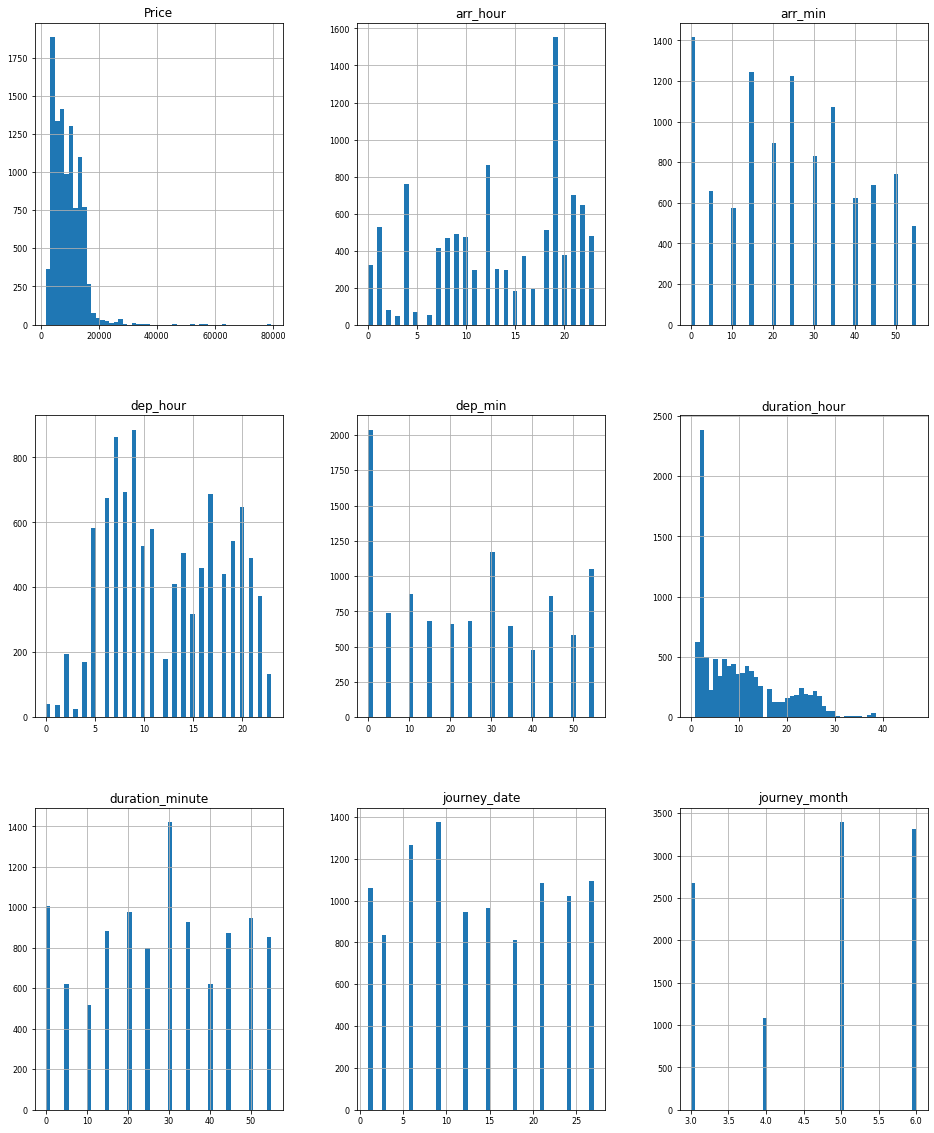

In [21]:
# Understanding numeric Distributions. 
train_num = train.select_dtypes(include = ["float64", "int64"])
train_num.head()
train_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

The average flight price is around Rs 10,000.

Most flights leave at 7 AM or 9 AM and most flights arrive at 8 PM. 

The average duration of the flights looks to be around 2 hours

#### Categorical Variables

[Text(0, 0, 'IndiGo'),
 Text(0, 0, 'Air India'),
 Text(0, 0, 'Jet Airways'),
 Text(0, 0, 'SpiceJet'),
 Text(0, 0, 'Multiple carriers'),
 Text(0, 0, 'GoAir'),
 Text(0, 0, 'Vistara'),
 Text(0, 0, 'Air Asia'),
 Text(0, 0, 'Vistara Premium economy'),
 Text(0, 0, 'Jet Airways Business'),
 Text(0, 0, 'Multiple carriers Premium economy'),
 Text(0, 0, 'Trujet')]

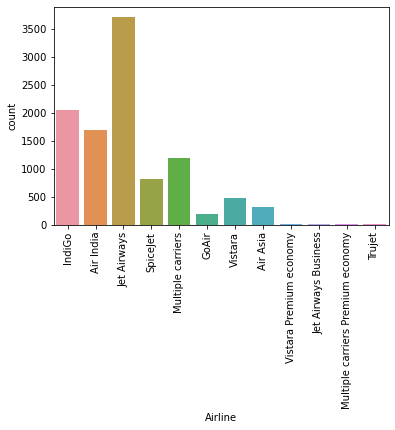

In [22]:
chart = sb.countplot(x = "Airline", data = train)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

Jet Airways economy class is the most popular tickets

[Text(0, 0, 'Banglore'),
 Text(0, 0, 'Kolkata'),
 Text(0, 0, 'Delhi'),
 Text(0, 0, 'Chennai'),
 Text(0, 0, 'Mumbai')]

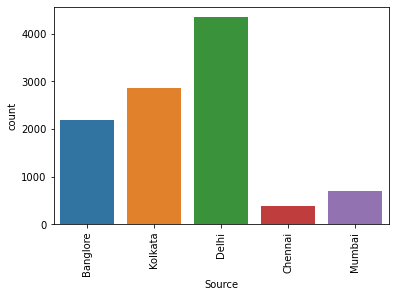

In [23]:
chart = sb.countplot(x = "Source", data = train)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

Delhi has the most number of departures

[Text(0, 0, 'New Delhi'),
 Text(0, 0, 'Banglore'),
 Text(0, 0, 'Cochin'),
 Text(0, 0, 'Kolkata'),
 Text(0, 0, 'Delhi'),
 Text(0, 0, 'Hyderabad')]

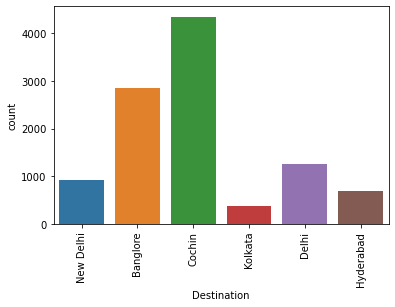

In [24]:
chart = sb.countplot(x = "Destination", data = train)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

There are 2 lines for Delhi - Delhi & New Delhi. I will replace New Delhi with Delhi in Destination for cleaner data processing. 

[Text(0, 0, 'Delhi'),
 Text(0, 0, 'Banglore'),
 Text(0, 0, 'Cochin'),
 Text(0, 0, 'Kolkata'),
 Text(0, 0, 'Hyderabad')]

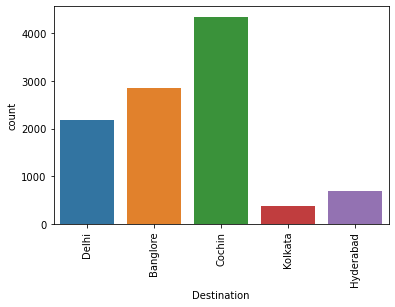

In [25]:
train["Destination"] = train["Destination"].replace("New Delhi", "Delhi")
chart = sb.countplot(x = "Destination", data = train)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

Cochin is the most popular arrival place.

[Text(0, 0, 'non-stop'),
 Text(0, 0, '2 stops'),
 Text(0, 0, '1 stop'),
 Text(0, 0, '3 stops'),
 Text(0, 0, '4 stops')]

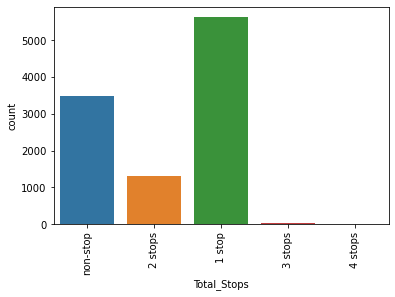

In [26]:
chart = sb.countplot(x = "Total_Stops", data = train)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

1-stop flights are the most common. It makes sense as this data is for domestic flights only.

#### <u>Bi-Variate Analysis</u>

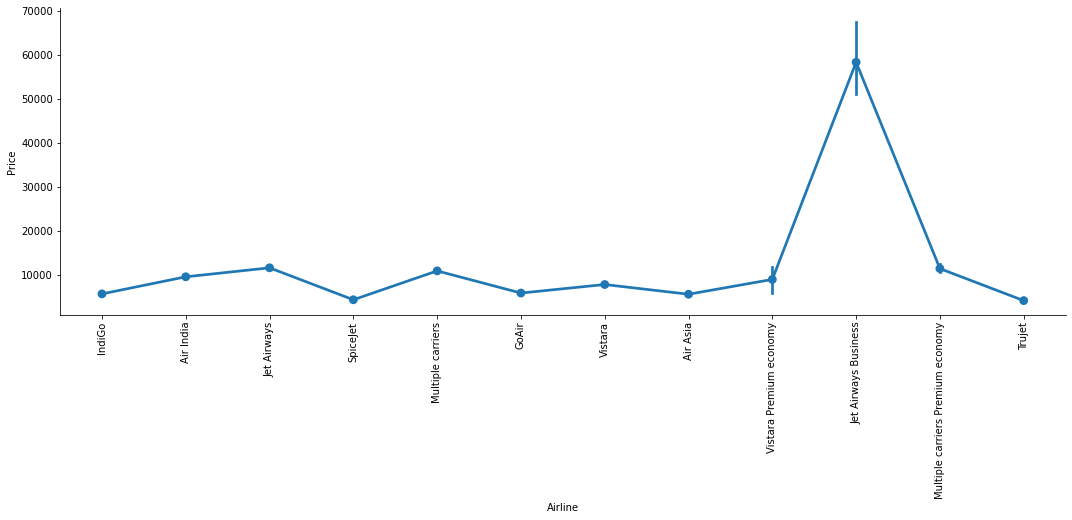

In [27]:
#Which airways has highest rate
sb.catplot(x='Airline',y='Price',kind='point',data=train,height=5,aspect=3)
plt.xticks(rotation=90)
plt.show()

Business Class of Jet Airways is the most expensive. 

In [28]:
counts = train.groupby(['Source','Destination']).size().sort_values(ascending=False)
print(counts)

counts.index[0]

Source    Destination
Delhi     Cochin         4345
Kolkata   Banglore       2860
Banglore  Delhi          2179
Mumbai    Hyderabad       697
Chennai   Kolkata         381
dtype: int64


('Delhi', 'Cochin')

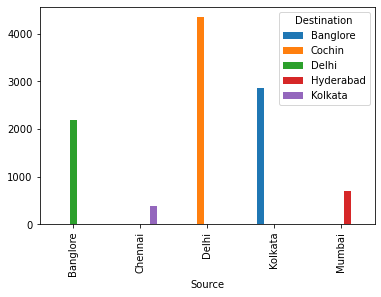

In [29]:
pd.crosstab(train['Source'],train['Destination']).plot.bar()

The flights from Delhi to Cochin are most popular. Flights from Chennai to Kolkata are the least popular

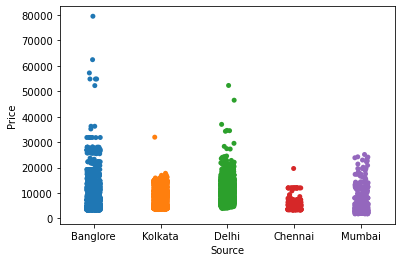

In [30]:
sb.stripplot(x = "Source", y = "Price", data = train)

On an average, tickets from Bangalore and Delhi are pretty expensive. Bangalore also has some outliers.

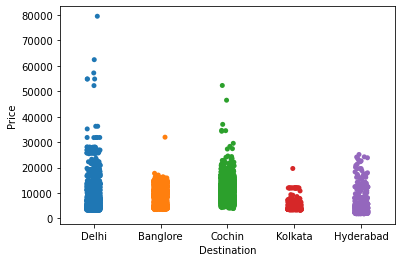

In [31]:
sb.stripplot(x = "Destination", y = "Price", data = train)

Tickets to Delhi & Cochin are expensive.

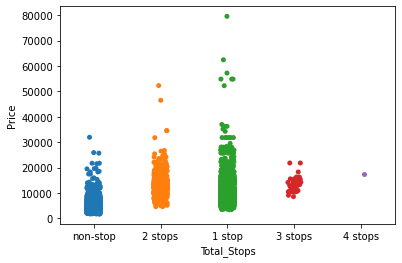

In [32]:
sb.stripplot(x='Total_Stops',y='Price',data=train)

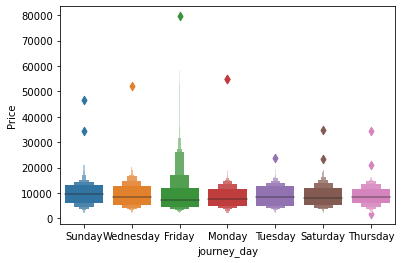

In [33]:
sb.boxenplot(x = "journey_day", y = "Price", data = train)

It looks like prices rapidly spike on Friday. It might be because if you are travelling anywhere you generally prefer to spend the weekend in the new place. 

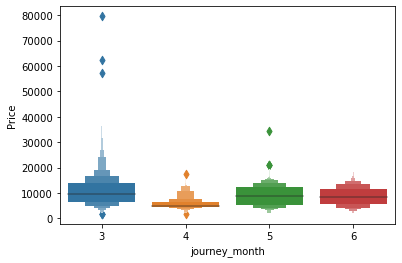

In [34]:
sb.boxenplot(x = "journey_month", y = "Price", data = train)

April is the cheapest month to fly. March has the most flight traffic, though the average price for the months of March , May and June are similar. 

### Test Data EDA

##### Continous Variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002455EACF160>,
      dtype=object)

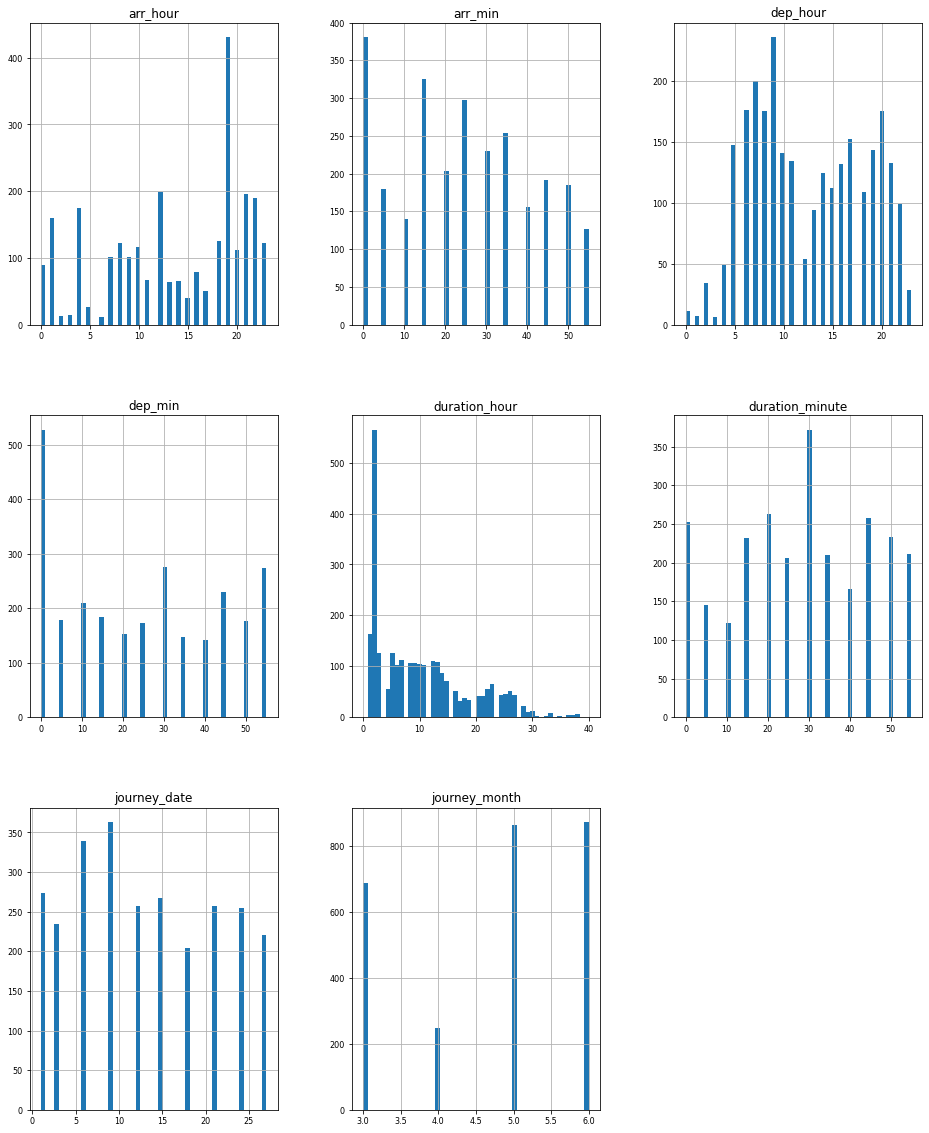

In [35]:
# Understanding numeric Distributions. 
test_num = test.select_dtypes(include = ["float64", "int64"])
test_num.head()
test_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

[Text(0, 0, 'Jet Airways'),
 Text(0, 0, 'IndiGo'),
 Text(0, 0, 'Multiple carriers'),
 Text(0, 0, 'Air Asia'),
 Text(0, 0, 'Air India'),
 Text(0, 0, 'Vistara'),
 Text(0, 0, 'SpiceJet'),
 Text(0, 0, 'Vistara Premium economy'),
 Text(0, 0, 'GoAir'),
 Text(0, 0, 'Multiple carriers Premium economy'),
 Text(0, 0, 'Jet Airways Business')]

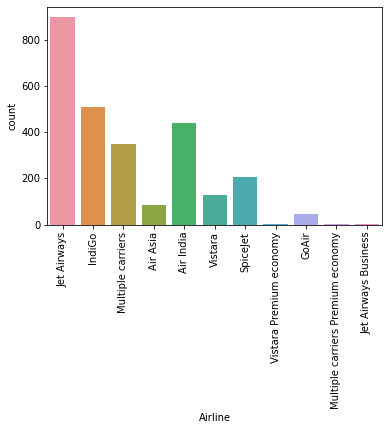

In [36]:
chart = sb.countplot(x = "Airline", data = test)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

[Text(0, 0, 'Delhi'),
 Text(0, 0, 'Kolkata'),
 Text(0, 0, 'Banglore'),
 Text(0, 0, 'Mumbai'),
 Text(0, 0, 'Chennai')]

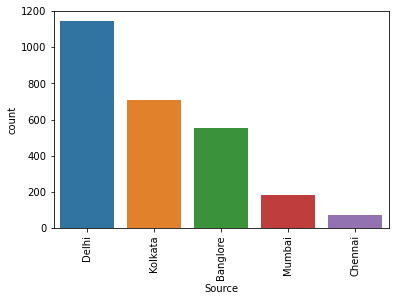

In [37]:
chart = sb.countplot(x = "Source", data = test)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

[Text(0, 0, 'Delhi'),
 Text(0, 0, 'Banglore'),
 Text(0, 0, 'Cochin'),
 Text(0, 0, 'Kolkata'),
 Text(0, 0, 'Hyderabad')]

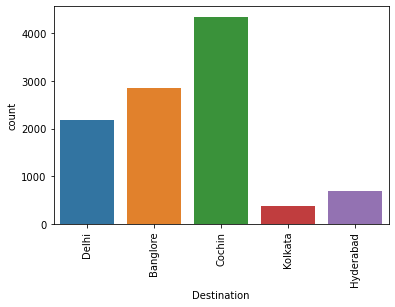

In [38]:
train["Destination"] = train["Destination"].replace("New Delhi", "Delhi")
chart = sb.countplot(x = "Destination", data = train)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

[Text(0, 0, 'non-stop'),
 Text(0, 0, '2 stops'),
 Text(0, 0, '1 stop'),
 Text(0, 0, '3 stops'),
 Text(0, 0, '4 stops')]

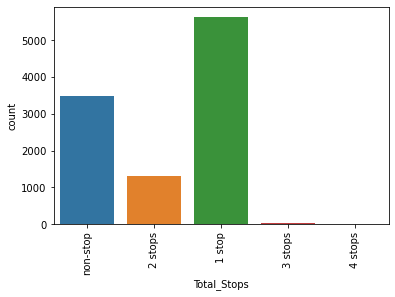

In [39]:
chart = sb.countplot(x = "Total_Stops", data = train)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

In [40]:
counts = test.groupby(['Source','Destination']).size().sort_values(ascending=False)
print(counts)

counts.index[0]

Source    Destination
Delhi     Cochin         1145
Kolkata   Banglore        710
Banglore  Delhi           317
          New Delhi       238
Mumbai    Hyderabad       186
Chennai   Kolkata          75
dtype: int64


('Delhi', 'Cochin')

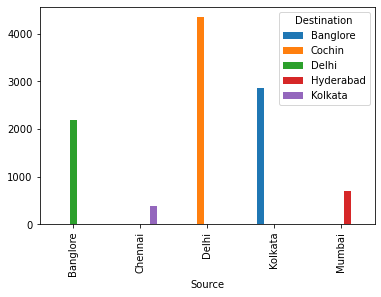

In [41]:
pd.crosstab(train['Source'],train['Destination']).plot.bar()

#### <u>Correlation Plot</u>

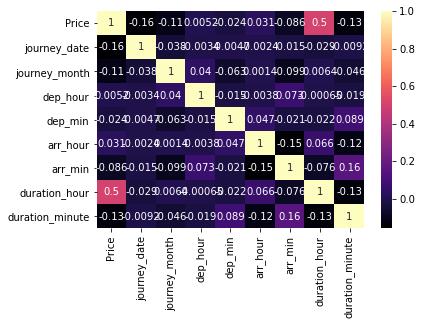

In [42]:
sb.heatmap(train.corr(), annot = True, cmap = "magma")

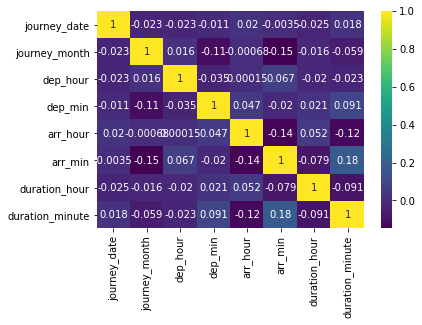

In [43]:
sb.heatmap(test.corr(), annot = True, cmap = "viridis")

The correlation plots for both train and test show that there does not seem to be any correlation between the columns. 

### EDA Conclusions

1. The Test & Train Datasets mirror each other, which means any models we build will be appropriate.

2. The most common flight path is from Delhi to Cochin. The least common flight path is from Chennai to Cochin. 

3. One-stop flights are the most commonly booked flights. 

4. Jet Airway Economy class is the most popular flight type. The most expensive flight type is Jet Airways Business Class. 

5. April is the cheapest month to fly. Friday has the most flight bookings. 

## Feature Selection

Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested.

Having irrelevant features in your data can decrease the accuracy of many models, especially linear algorithms like linear and logistic regression.

Three benefits of performing feature selection before modeling your data are:

Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
Improves Accuracy: Less misleading data means modeling accuracy improves.
Reduces Training Time: Less data means that algorithms train faster.
There are many ways to do feature selection - Univariate Feature Selection, Recursive Feature Selection, Model Feature Selection. I am using Univariate Feature Selection as it checks how each feature affects the predicted variable.

#### Treating Train Data For Feature Selection

In [44]:
Airline = train[["Airline"]]
Airline = pd.get_dummies(train.Airline, drop_first= True)

Airline_test = pd.get_dummies(test.Airline, drop_first= True)

In [45]:
Source = pd.get_dummies(train.Source, drop_first= True)
Source = Source.rename(columns= {"Chennai": "Source_Chennai", "Delhi": "Source_Delhi", "Kolkata": "Source_Kolkata", "Mumbai": "Source_Mumbai", "Bangalore": "Source_Bangalore"})

Source_test = pd.get_dummies(test.Source, drop_first= True)
Source_test = Source_test.rename(columns= {"Chennai": "Source_Chennai", "Delhi": "Source_Delhi", "Kolkata": "Source_Kolkata", "Mumbai": "Source_Mumbai", "Bangalore": "Source_Bangalore"})

In [46]:
Destination = pd.get_dummies(train.Destination, drop_first= True)
Destination = Destination.rename(columns= {"Cochin": "Dest_Cochin", "Delhi": "Dest_Delhi", "Kolkata": "Dest_Kolkata", "Hyderabad": "Dest_Hyderabad", "Bangalore": "Dest_Bangalore"})

Destination_test = pd.get_dummies(test.Destination, drop_first= True)
Destination_test = Destination_test.rename(columns= {"Cochin": "Dest_Cochin", "Delhi": "Dest_Delhi", "Kolkata": "Dest_Kolkata", "Hyderabad": "Dest_Hyderabad", "Bangalore": "Dest_Bangalore"})

In [47]:
Stops = pd.get_dummies(train.Total_Stops, drop_first= True)

Stops_test = pd.get_dummies(test.Total_Stops, drop_first= True)

In [48]:
# New Dataset with the Airline, Source & Destination lines 
train.drop(["Airline", "Source", "Destination"], axis= 1, inplace= True)
test.drop(["Airline", "Source", "Destination"], axis= 1, inplace= True)

In [49]:
final_train = pd.concat([train, Airline, Source, Destination, Stops], axis= 1)
final_test = pd.concat([test, Airline_test, Source_test, Destination_test, Stops_test], axis= 1)

In [50]:
final_train.shape, final_test.shape

((10462, 35), (2671, 34))

In [55]:
final_train.columns

Index(['Total_Stops', 'Additional_Info', 'Price', 'journey_day',
       'journey_date', 'journey_month', 'dep_hour', 'dep_min', 'arr_hour',
       'arr_min', 'duration_hour', 'duration_minute', 'Air India', 'GoAir',
       'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Dest_Cochin', 'Dest_Delhi',
       'Dest_Hyderabad', 'Dest_Kolkata', '2 stops', '3 stops', '4 stops',
       'non-stop'],
      dtype='object')

In [56]:
x = final_train.loc[:, ['journey_date', 'journey_month', 'dep_hour', 'dep_min', 'arr_hour',
       'arr_min', 'duration_hour', 'duration_minute', 'Air India', 'GoAir',
       'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Dest_Cochin', 'Dest_Delhi',
       'Dest_Hyderabad', 'Dest_Kolkata', '2 stops', '3 stops', '4 stops',
       'non-stop']]

x.head()

,journey_date,journey_month,dep_hour,dep_min,arr_hour,arr_min,duration_hour,duration_minute,Air India,GoAir,...,Source_Kolkata,Source_Mumbai,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,2 stops,3 stops,4 stops,non-stop
0,24,3,22,20,1,10,2,50,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,5,5,50,13,15,7,25,1,0,...,1,0,0,0,0,0,1,0,0,0
2,9,6,9,25,4,25,19,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,12,5,18,5,23,30,5,25,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,3,16,50,21,35,4,45,0,0,...,0,0,0,1,0,0,0,0,0,0


In [57]:
y = final_train.loc[:, "Price"]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [58]:
final_test.columns

Index(['Total_Stops', 'Additional_Info', 'journey_day', 'journey_date',
       'journey_month', 'dep_hour', 'dep_min', 'arr_hour', 'arr_min',
       'duration_hour', 'duration_minute', 'Air India', 'GoAir', 'IndiGo',
       'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Dest_Cochin', 'Dest_Delhi',
       'Dest_Hyderabad', 'Dest_Kolkata', 'New Delhi', '2 stops', '3 stops',
       '4 stops', 'non-stop'],
      dtype='object')

### SelectKBest Using Chi-Squared Method

In [59]:
# call packages
from sklearn.feature_selection import SelectKBest, chi2

# Using SelectKBest to extract top 10 features
topfeatures = SelectKBest(score_func = chi2, k = 10)
fit = topfeatures.fit(x, y)
xyscore = pd.DataFrame(fit.scores_)
xycolumn = pd.DataFrame(x.columns)

In [60]:
# Concatenate both data frames to get features and scores
featurescore = pd.concat([xycolumn, xyscore], axis = 1)

# rename columns featurescore dataframe
featurescore.columns = ["Feature", "Score"]

In [61]:
# Sort the featurescore by higest-to-lowest scores
featurescore = featurescore.sort_values(by = "Score", ascending= False)
featurescore

,Feature,Score
3,dep_min,66888.808672
6,duration_hour,56965.976056
5,arr_min,49859.587431
7,duration_minute,43259.559538
0,journey_date,22040.278740
4,arr_hour,18520.476928
2,dep_hour,10635.788092
16,Trujet,10461.000000
29,4 stops,10461.000000
18,Vistara Premium economy,10459.000000


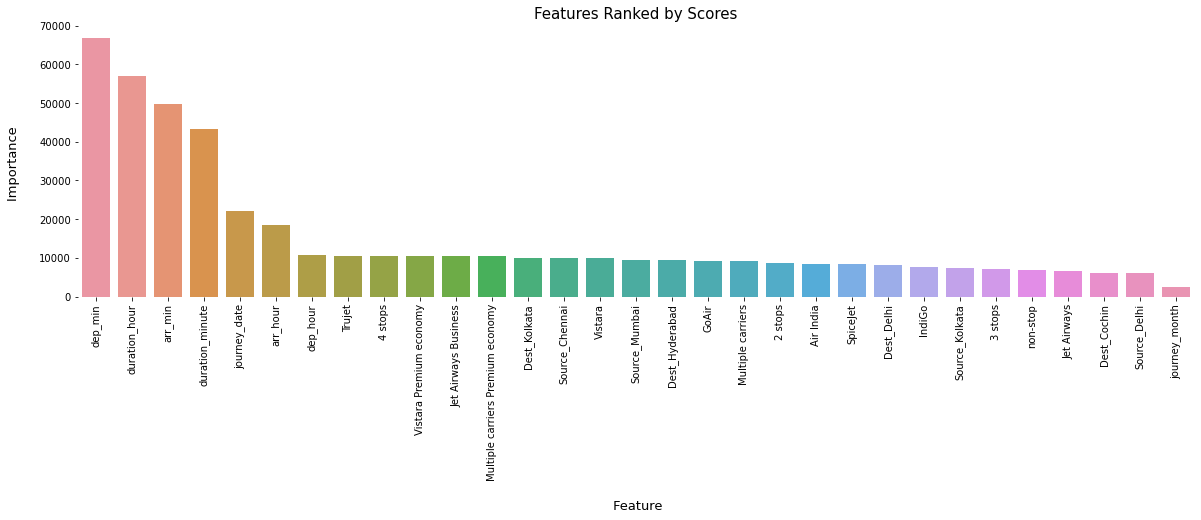

In [62]:
# Plotting the Features based on Scores
plt.figure(figsize= (20,5))
sb.barplot(x = "Feature", y = "Score", data = featurescore)
plt.box(False)
plt.title("Features Ranked by Scores", fontsize = 15)
plt.xlabel("\n Feature", fontsize = 13)
plt.ylabel("Importance \n", fontsize = 13)
plt.xticks(fontsize = 10, rotation = 90)
plt.xticks(fontsize = 10)
plt.show()

In [63]:
# Selecting through 15 most important features
features_list = featurescore["Feature"].tolist()[:15]
features_list

['dep_min',
 'duration_hour',
 'arr_min',
 'duration_minute',
 'journey_date',
 'arr_hour',
 'dep_hour',
 'Trujet',
 '4 stops',
 'Vistara Premium economy',
 'Jet Airways Business',
 'Multiple carriers Premium economy',
 'Dest_Kolkata',
 'Source_Chennai',
 'Vistara']

### Extra Tree Regression Method

In [64]:
# Important feature using ExtraTreeRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
tree_fit = selection.fit(x,y)

In [65]:
xyscore = pd.DataFrame(tree_fit.feature_importances_)
xycolumn = pd.DataFrame(x.columns)

In [66]:
# Concatenate both data frames to get features and scores
tree_featurescore = pd.concat([xycolumn, xyscore], axis = 1)

# rename columns featurescore dataframe
tree_featurescore.columns = ["Feature", "Importance"]

In [67]:
# Sort the featurescore by higest-to-lowest scores
tree_featurescore = tree_featurescore.sort_values(by = "Importance", ascending= False)
tree_featurescore

,Feature,Importance
30,non-stop,0.372559
0,journey_date,0.143255
11,Jet Airways,0.074533
12,Jet Airways Business,0.066095
1,journey_month,0.056330
6,duration_hour,0.040849
10,IndiGo,0.032261
4,arr_hour,0.028358
2,dep_hour,0.024573
27,2 stops,0.022393


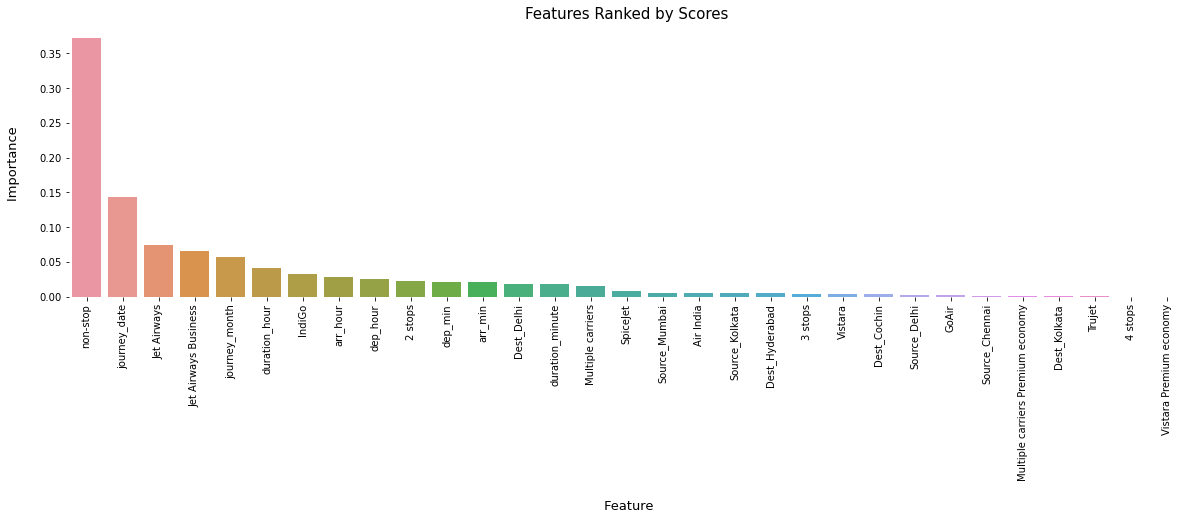

In [68]:
# Plotting the Features based on Scores
plt.figure(figsize= (20,5))
sb.barplot(x = "Feature", y = "Importance", data = tree_featurescore)
plt.box(False)
plt.title("Features Ranked by Scores", fontsize = 15)
plt.xlabel("\n Feature", fontsize = 13)
plt.ylabel("Importance \n", fontsize = 13)
plt.xticks(fontsize = 10, rotation = 90)
plt.xticks(fontsize = 10)
plt.show()

In [69]:
# Selecting through 15 most important features
tree_features_list = tree_featurescore["Feature"].tolist()[:15]
tree_features_list

['non-stop',
 'journey_date',
 'Jet Airways',
 'Jet Airways Business',
 'journey_month',
 'duration_hour',
 'IndiGo',
 'arr_hour',
 'dep_hour',
 '2 stops',
 'dep_min',
 'arr_min',
 'Dest_Delhi',
 'duration_minute',
 'Multiple carriers']

### Feature Selection Notes

After Feature selection using SelectKBest - ChiSquared and Extra Tree Regression method, SelectKBest shows that all columns are equally important. Based on the SelectKBest plot, out of 31 columns, only "Journey Month" is an unimportant factor that can be ignored. So a model that says 30 columns out of 31 are important is not to be used. 

Extra Tree Regression method shows better results. The plot shows that 15 columns or features are the most important. There is a sharp decline between the importance factor of the first 15 features and the rest 16. 

Based on Extra Tree Regression Method, the most important features: 

1. Whether a flight is non-stop 
2. The Date of the journey
3. Jet Airways Economy Class
4. Jet Airways Business Class
5. The Month of the journey 
6. How many hours of journey
7. Indigo Economy Class
8. The Arrival Hour 
9. The departure Hour
10. Flight has 2-stops between departure and final arrival airports
11. The Departure Minute
12. The Arrival Minute
13. Destination Airport is Delhi
14. How many minutes of Journey
15. Multiple Carrier Airlines

This shows that the factors that people take into consideration while booking a flight are:

<i>Whether it is a Non-Stop or Two-Stop flight 

The Date and Month of trip, 
 
Departure & Arrival times, 

Flight Duration, 

Jet Airways (Economy & Business), Indigo Economy are both highly sought

Delhi Destination</i>

## Model Building 

Using KNN (K Nearest Neighbors), Lasso, Ridge & Random Forest Models

### Data Preparation

#### Data Scaling

The algorithms which use Euclidean Distance measure are sensitive to Magnitudes. Here feature scaling helps to weigh all the features equally. Formally, If a feature in the dataset is big in scale compared to others then in algorithms where Euclidean distance is measured this big scaled feature becomes dominating and needs to be normalized.

In [70]:
from sklearn.preprocessing import StandardScaler 

scaler =StandardScaler()
x = scaler.fit_transform(x)

#### Splitting Data 

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1234)

#### Importing All Libraries

In [72]:
#import sys
#!{sys.executable} -m pip install xgboost

In [73]:
#pip install mlxtend

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score 

from sklearn.preprocessing import LabelEncoder

### KNN Regression

In [75]:
knr = KNeighborsRegressor(n_neighbors= 5)
knr.fit(X_train, y_train)
y_train_pred = knr.predict(X_train)
y_test_pred = knr.predict(X_test)

In [76]:
print("Train Results for KNN Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("R-squared: ", r2_score(y_train, y_train_pred))

Train Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  1882.0080661925983
R-squared:  0.8384134676931219


In [77]:
print("Test Results for KNN Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  2241.513404039186
R-squared:  0.7389812916651766


### Ridge Regression

In [78]:
ridge_regressor = Ridge(alpha= 5)
ridge_regressor.fit(X_train, y_train)
y_train_pred = ridge_regressor.predict(X_train)
y_test_pred = ridge_regressor.predict(X_test)

In [79]:
print("Train Results for Ridge Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("R-squared: ", r2_score(y_train, y_train_pred))

Train Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  2873.429649009838
R-squared:  0.6233280005953465


In [80]:
print("Test Results for Ridge Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  2823.8407767250387
R-squared:  0.5857434670020465


### Lasso Regression

In [81]:
lasso_regressor = Lasso(alpha= 5)
lasso_regressor.fit(X_train, y_train)
y_train_pred = lasso_regressor.predict(X_train)
y_test_pred = lasso_regressor.predict(X_test)

In [82]:
print("Train Results for Lasso Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("R-squared: ", r2_score(y_train, y_train_pred))

Train Results for Lasso Regressor Model:
--------------------------------------------------
Root mean squared error:  2873.9497614964584
R-squared:  0.6231916272958804


In [83]:
print("Test Results for Lasso Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Lasso Regressor Model:
--------------------------------------------------
Root mean squared error:  2822.1267668431997
R-squared:  0.586246203776497


#### Decision Tree Regression 

In [84]:
dec_tree = DecisionTreeRegressor()
dec_tree.fit(X_train, y_train)
y_train_pred = dec_tree.predict(X_train)
y_test_pred = dec_tree.predict(X_test)

In [85]:
print("Train Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("R-squared: ", r2_score(y_train, y_train_pred))

Train Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  787.962410243904
R-squared:  0.9716747859819077


In [86]:
print("Test Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  2582.4614449990986
R-squared:  0.6535371699617276


### Random Forest Regression 

In [87]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [88]:
print("Train Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("R-squared: ", r2_score(y_train, y_train_pred))

Train Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  991.0356517462855
R-squared:  0.9551935272891521


In [89]:
print("Test Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  1930.8717835526384
R-squared:  0.8063150713623849


### XGBoost Regression

In [90]:
xgboost = XGBRegressor()
xgboost.fit(X_train, y_train)
y_train_pred = xgboost.predict(X_train)
y_test_pred = xgboost.predict(X_test)

In [91]:
print("Train Results for XGBoost Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("R-squared: ", r2_score(y_train, y_train_pred))

Train Results for XGBoost Regressor Model:
--------------------------------------------------
Root mean squared error:  1197.9730062977428
R-squared:  0.9345279009655242


In [92]:
print("Test Results for XGBoost Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for XGBoost Regressor Model:
--------------------------------------------------
Root mean squared error:  1821.0287680738015
R-squared:  0.827724876818335


#### Summary of Models so far:

<u>Test R-Squared Per Model</u>: 

KNN Model: 73.89%

Ridge Regression Model: 58.57%

Lasso Regression Model: 58.62%

Decision Tree Model: 69.46%

Random Forest Model: 80.44%

XGBoost Model: 82.77%

This shows that the XGBoost and Random Forest models gives the best results. I will fine tune it further to get a higher accuracy.  

### Hyper Parameter Tuning

#### Random Forest: 

In [93]:
params = {"n_estimators": [100, 200, 300, 400, 500], "min_samples_split": [3, 5, 8, 10], "min_samples_leaf": [1, 2, 3, 4]}
rf_n_model = RandomizedSearchCV(rf_model, params, n_iter= 25, scoring= "neg_mean_absolute_error", cv = 5, n_jobs= -1)
rf_n_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=25,
                   n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [3, 5, 8, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='neg_mean_absolute_error')

In [94]:
print(rf_n_model.best_estimator_)
rf_n_model.best_params_

RandomForestRegressor(min_samples_split=8, n_estimators=400)


{'n_estimators': 400, 'min_samples_split': 8, 'min_samples_leaf': 1}

In [95]:
y_train_pred = rf_n_model.predict(X_train)
y_test_pred = rf_n_model.predict(X_test)

In [96]:
print("Train Results for Hyper Tuned Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("R-squared: ", r2_score(y_train, y_train_pred))

Train Results for Hyper Tuned Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  1304.8431322650335
R-squared:  0.9223254388483745


In [97]:
print("Test Results for Hyper Tuned Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Hyper Tuned Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  1794.9484759302195
R-squared:  0.8326240985602971


#### XGBoost:

In [98]:
params = {"max_depth": [1, 2, 3, 4, 5], "learning_rate": [0.01, 0.03, 0.05, 0.07, 1], "n_estimators": [100, 200, 300, 400, 500], "reg_lambda": [0.01, 0.1, 0, 1, 10, 100]}
xgboost_n = RandomizedSearchCV(xgboost, params, n_iter= 20, scoring= "neg_mean_absolute_error", cv = 5, n_jobs= -1)
xgboost_n.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=8,
                                          num_par...l_tree=1, random_state=0,
                                          reg_alpha=0, reg_lambda=1,
                                          scale_pos_w

In [99]:
print(xgboost_n.best_estimator_)
xgboost_n.best_params_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.07, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=400, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=0, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


{'reg_lambda': 0, 'n_estimators': 400, 'max_depth': 4, 'learning_rate': 0.07}

In [100]:
y_train_pred = xgboost_n.predict(X_train)
y_test_pred = xgboost_n.predict(X_test)

In [101]:
print("Train Results for Hyper Tuned XGBoost Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("R-squared: ", r2_score(y_train, y_train_pred))

Train Results for Hyper Tuned XGBoost Regressor Model:
--------------------------------------------------
Root mean squared error:  1657.9927657341996
R-squared:  0.8745913587148691


In [102]:
print("Test Results for Hyper Tuned XGBoost Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Hyper Tuned XGBoost Regressor Model:
--------------------------------------------------
Root mean squared error:  1927.716356992631
R-squared:  0.8069475931033748


#### Summary of Hyper Tuned Models:

<u>Test R-Squared Per Model</u>:

Random Forest Model: 83.26%

XGBoost Model: 80.70%

Since both these models give almost the same r-squared values, Stacking them might give a higher accuracy.

### Stacking

In [103]:
# Intializing Models

ridge = Ridge()
lasso = Lasso()
rf = RandomForestRegressor()
xgboost = XGBRegressor()
knn = KNeighborsRegressor()

stack = StackingRegressor(regressors= [ridge, lasso, knn, xgboost], meta_regressor= rf)
stack.fit(X_train, y_train)

StackingRegressor(meta_regressor=RandomForestRegressor(),
                  regressors=[Ridge(), Lasso(), KNeighborsRegressor(),
                              XGBRegressor(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,


In [104]:
print(stack.regr_)
stack.meta_regr_

[Ridge(), Lasso(), KNeighborsRegressor(), XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)]


RandomForestRegressor()

In [105]:
y_train_pred = stack.predict(X_train)
y_test_pred = stack.predict(X_test)

In [106]:
print("Train Results for Stacked Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("R-squared: ", r2_score(y_train, y_train_pred))

Train Results for Stacked Regressor Model:
--------------------------------------------------
Root mean squared error:  860.8160872049679
R-squared:  0.9661948436184575


In [107]:
print("Test Results for Stacked Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Stacked Regressor Model:
--------------------------------------------------
Root mean squared error:  2085.371772900175
R-squared:  0.7740793456848587


### Model Conclusions: 

The best RMSE & R-squared results are for hyper-parameter tuned Random Forest and hyper-parameter tuned XGBoost. The stacking of different models shows a comparitively low r-squared and RMSE values as well. Use the hyper tuned Random forest & XGBoost models to get price on the test dataset. 

### Test Dataset Price Prediction

In [108]:
test_dataset = final_test.loc[:, ['journey_date',
       'journey_month', 'dep_hour', 'dep_min', 'arr_hour', 'arr_min',
       'duration_hour', 'duration_minute', 'Air India', 'GoAir', 'IndiGo',
       'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Dest_Cochin', 'Dest_Delhi',
       'Dest_Hyderabad', 'Dest_Kolkata', 'New Delhi', '2 stops', '3 stops',
       '4 stops', 'non-stop']]

test_dataset.head()

,journey_date,journey_month,dep_hour,dep_min,arr_hour,arr_min,duration_hour,duration_minute,Air India,GoAir,...,Source_Mumbai,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,New Delhi,2 stops,3 stops,4 stops,non-stop
0,6,6,17,30,4,25,10,55,0,0,...,0,1,0,0,0,0,0,0,0,0
1,12,5,6,20,10,20,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,21,5,19,15,19,0,23,45,0,0,...,0,1,0,0,0,0,0,0,0,0
3,21,5,8,0,21,0,13,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,24,6,23,55,2,45,2,50,0,0,...,0,0,1,0,0,0,0,0,0,1


In [109]:
scaler =StandardScaler()
test_x = scaler.fit_transform(test_dataset)

In [110]:
# Price based on Hyper Tuned Random Forest Model
price_rf = rf_n_model.predict(test_x)

In [111]:
# Price based on Hyper Tuned XGBoost Model
price_xgb = xgboost_n.predict(test_x)

In [112]:
price_rf = pd.DataFrame(price_rf)
price_xgb = pd.DataFrame(price_xgb)

In [113]:
price_rf.to_csv("price_rf.csv", index= False)
price_xgb.to_csv("price_xgb.csv", index= False)